# Final Project

Ok, so today we'll be working with the transactions, product, and hh_demographic tables in the project_data folder.

* First, read in the transactions data.

* Read in the only columns `household_key`, `BASKET_ID`, `DAY`, `PRODUCT_ID`, `QUANTITY`, and `SALES_VALUE`.

* Convert `DAY`, `QUANTITY`, and `PRODUCT_ID` to the smallest appropriate integer types.


In [114]:
import pandas as pd
import numpy as np

In [115]:
transactions = pd.read_csv('../project_data/project_transactions.csv')
demographic = pd.read_csv('../project_data/hh_demographic.csv')
product = pd.read_csv('../project_data/product.csv')

In [116]:
transactions = transactions.loc[:,['household_key', 'BASKET_ID','DAY','PRODUCT_ID','QUANTITY','SALES_VALUE']]

In [117]:
transactions = (
    transactions
    .assign(date = (pd.to_datetime("2016", format='%Y') 
                    + pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + " days"))
           )
    .drop(["DAY"], axis=1)
)

In [118]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   household_key  int64         
 1   BASKET_ID      int64         
 2   PRODUCT_ID     int64         
 3   QUANTITY       int64         
 4   SALES_VALUE    float64       
 5   date           datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 98.3 MB


In [119]:
transactions = transactions.astype({
    'QUANTITY': 'int32'
})

In [120]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   household_key  int64         
 1   BASKET_ID      int64         
 2   PRODUCT_ID     int64         
 3   QUANTITY       int32         
 4   SALES_VALUE    float64       
 5   date           datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3)
memory usage: 90.1 MB


## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

<Axes: xlabel='date'>

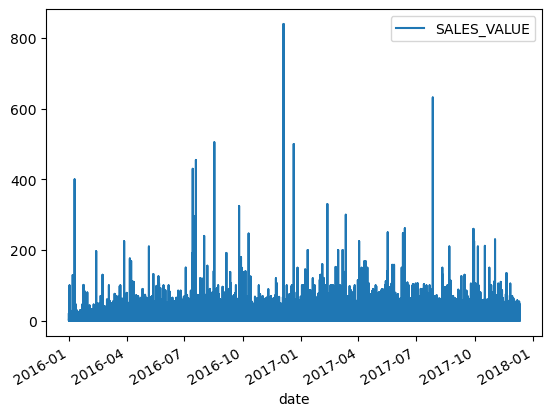

In [121]:
transactions.loc[:,['date','SALES_VALUE']].plot(
    x='date'
)

<Axes: xlabel='date'>

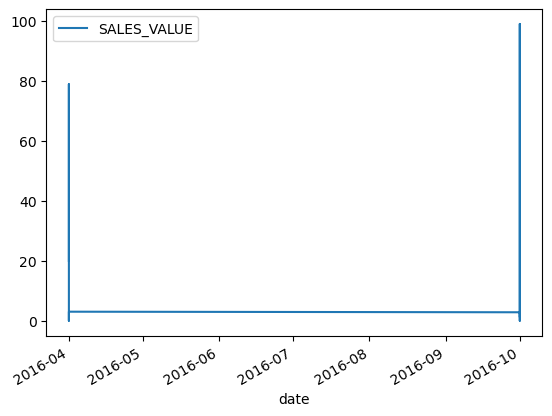

In [122]:
transactions.loc[:,['date','SALES_VALUE']].set_index('date').loc[['2016-04','2016-10']].plot()

<Axes: xlabel='date'>

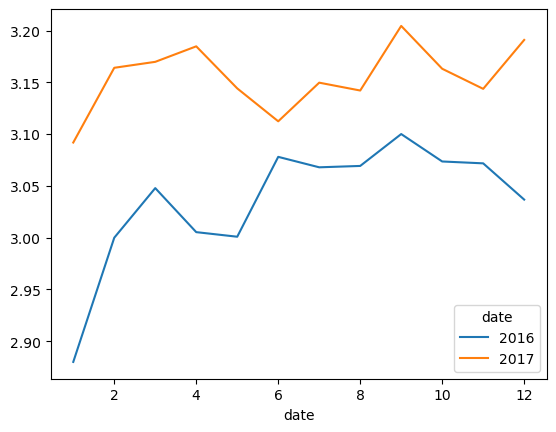

In [123]:
(
transactions
.loc[:,['date','SALES_VALUE']]
.pivot_table(
    index=transactions['date'].dt.month,
    columns=transactions['date'].dt.year,
    values='SALES_VALUE'
)
.plot()
)

# DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc (in separate charts).


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


In [124]:
demographic = demographic.loc[:,['AGE_DESC','INCOME_DESC','household_key','HH_COMP_DESC']]

In [125]:
demographic

,AGE_DESC,INCOME_DESC,household_key,HH_COMP_DESC
0,65+,35-49K,1,2 Adults No Kids
1,45-54,50-74K,7,2 Adults No Kids
2,25-34,25-34K,8,2 Adults Kids
3,25-34,75-99K,13,2 Adults Kids
4,45-54,50-74K,16,Single Female
...,...,...,...,...
796,35-44,50-74K,2494,2 Adults No Kids
797,45-54,75-99K,2496,Unknown
798,45-54,35-49K,2497,Single Male
799,25-34,50-74K,2498,2 Adults No Kids


In [126]:
transactions_household = transactions.groupby('household_key').agg({
    'SALES_VALUE': 'sum'
})

In [127]:
household_sales = transactions_household.merge(
    demographic,
    how='inner',
    left_on='household_key',
    right_on='household_key'
)

In [128]:
household_sales

,household_key,SALES_VALUE,AGE_DESC,INCOME_DESC,HH_COMP_DESC
0,1,4330.16,65+,35-49K,2 Adults No Kids
1,7,3400.05,45-54,50-74K,2 Adults No Kids
2,8,5534.97,25-34,25-34K,2 Adults Kids
3,13,13190.92,25-34,75-99K,2 Adults Kids
4,16,1512.02,45-54,50-74K,Single Female
...,...,...,...,...,...
663,2087,7832.74,45-54,100-124K,Unknown
664,2088,4905.71,25-34,35-49K,Single Female
665,2092,2290.54,35-44,Under 15K,1 Adult Kids
666,2094,3055.52,45-54,50-74K,2 Adults No Kids


<Axes: xlabel='AGE_DESC'>

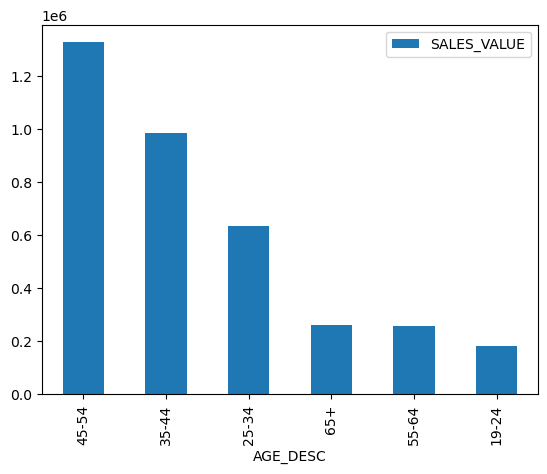

In [129]:
(
household_sales
.groupby('AGE_DESC')[['SALES_VALUE']]
.sum()
.sort_values('SALES_VALUE',ascending=False)
.plot.bar()
)
    

<Axes: xlabel='INCOME_DESC'>

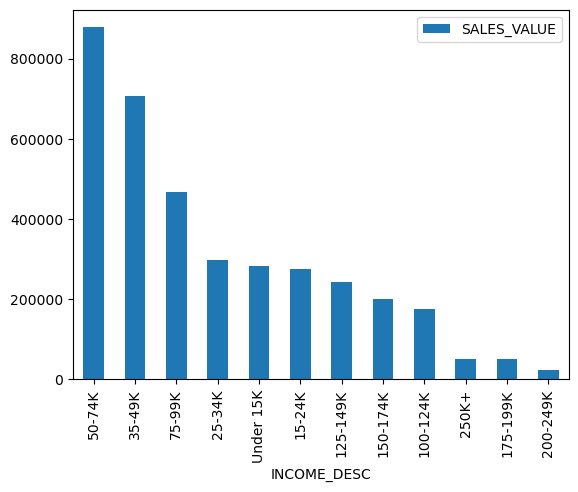

In [130]:
(
household_sales
.groupby('INCOME_DESC')[['SALES_VALUE']]
.sum()
.sort_values('SALES_VALUE',ascending=False)
.plot.bar()
)

In [131]:
household_sales.pivot_table(
    columns=['AGE_DESC','INCOME_DESC'],
    values='SALES_VALUE',
    aggfunc='mean'
).melt().sort_values('value',ascending=False)

,AGE_DESC,INCOME_DESC,value
12,25-34,175-199K,13497.290000
46,55-64,150-174K,12106.730000
3,19-24,250K+,11938.200000
32,45-54,125-149K,11203.315455
24,35-44,200-249K,10435.960000
...,...,...,...
2,19-24,25-34K,3216.626000
56,65+,25-34K,3156.175000
54,65+,15-24K,3046.005556
1,19-24,200-249K,2206.060000


# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



In [132]:
product = product.loc[:,['PRODUCT_ID','DEPARTMENT']]

In [136]:
full_transactions = (
    transactions
    .merge(
        demographic,
        how='inner',
        left_on='household_key',
        right_on='household_key'
    )
    .merge(
        product,
        how='inner',
        left_on='PRODUCT_ID',
        right_on='PRODUCT_ID'
    )
)

In [137]:
full_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161575 entries, 0 to 1161574
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   household_key  1161575 non-null  int64         
 1   BASKET_ID      1161575 non-null  int64         
 2   PRODUCT_ID     1161575 non-null  int64         
 3   QUANTITY       1161575 non-null  int32         
 4   SALES_VALUE    1161575 non-null  float64       
 5   date           1161575 non-null  datetime64[ns]
 6   AGE_DESC       1161575 non-null  object        
 7   INCOME_DESC    1161575 non-null  object        
 8   HH_COMP_DESC   1161575 non-null  object        
 9   DEPARTMENT     1161575 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(4)
memory usage: 93.1+ MB


In [142]:
full_transactions = full_transactions.astype({
    'AGE_DESC': 'string',
    'INCOME_DESC': 'string',
    'HH_COMP_DESC': 'string',
    'DEPARTMENT': 'string'
})

In [143]:
full_transactions

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date,AGE_DESC,INCOME_DESC,HH_COMP_DESC,DEPARTMENT
0,1364,26984896261,842930,1,2.19,2016-01-01,65+,100-124K,Single Female,GROCERY
1,304,27950201718,842930,1,1.67,2016-03-21,25-34,50-74K,2 Adults No Kids,GROCERY
2,575,34186568032,842930,1,1.67,2017-04-29,35-44,50-74K,Single Female,GROCERY
3,77,28023861855,842930,3,5.00,2016-03-27,35-44,100-124K,2 Adults Kids,GROCERY
4,454,42136182098,842930,1,1.67,2017-11-29,55-64,35-49K,Single Male,GROCERY
...,...,...,...,...,...,...,...,...,...,...
1161570,540,41413346731,913709,1,10.99,2017-10-06,25-34,50-74K,Single Female,DRUG GM
1161571,540,41587471481,1024615,1,11.99,2017-10-19,25-34,50-74K,Single Female,DRUG GM
1161572,540,41587471481,9831733,1,0.00,2017-10-19,25-34,50-74K,Single Female,DRUG GM
1161573,540,41834711355,830676,1,8.99,2017-11-07,25-34,50-74K,Single Female,NUTRITION


In [148]:
(
    full_transactions
    .pivot_table(
        columns=['AGE_DESC','DEPARTMENT'],
        values='SALES_VALUE'
    )
    .melt()
    .sort_values(['AGE_DESC','value'],ascending=[True,False])
)


,AGE_DESC,DEPARTMENT,value
13,19-24,KIOSK-GAS,20.447295
26,19-24,SPIRITS,17.551471
16,19-24,MISC SALES TRAN,17.218051
11,19-24,GARDEN CENTER,13.993333
9,19-24,FLORAL,8.930920
...,...,...,...
165,65+,DAIRY DELI,0.970000
164,65+,COUP/STR & MFG,0.788077
182,65+,POSTAL CENTER,0.330000
162,65+,CNTRL/STORE SUP,0.100000


# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.

In [150]:
(
    full_transactions
    .pivot_table(
        columns=['AGE_DESC','DEPARTMENT'],
        values='SALES_VALUE'
    )
    .melt()
    .sort_values(['AGE_DESC','value'],ascending=[True,False])
    .to_excel('../project_data/demographic_performance.xlsx',sheet_name='Demographic Performance')
)
